In [1]:
# Import necessary libraries
print("Importing Libraries...")
import pandas as pd
import numpy as np
import re
import time
import joblib
import pickle
from scipy.special import expit  # Sigmoid function

# Data Preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder, StandardScaler


# ML & NLP Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, f1_score, accuracy_score, recall_score, precision_score, auc, precision_recall_curve)

# Deep Learning
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset


# BERT-related
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertForSequenceClassification, AdamW, get_scheduler  # If using DistilBERT

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully.")

Importing Libraries...
Libraries imported successfully.


### Importing Necessary Libraries

In this section, we are importing various libraries and modules needed to build and train the machine learning model for detecting cyberbullying. These libraries handle different tasks, such as data preprocessing, model training, evaluation, and visualization. Here's a breakdown of the imports:

1. **Pandas (`import pandas as pd`)**:
   - A powerful data manipulation and analysis library that will be used to handle datasets (e.g., loading CSV files, data cleaning, and manipulation).
   
2. **NumPy (`import numpy as np`)**:
   - A library used for working with arrays and matrices, which is essential for numerical computing in machine learning tasks.

3. **Scikit-learn (`import ... from sklearn`)**:
   - **`train_test_split`**: Used to split the dataset into training and testing subsets.
   - **`TfidfVectorizer`**: This is used to convert text data into a numerical format based on the Term Frequency-Inverse Document Frequency (TF-IDF) method.
   - **`SVC` (Support Vector Classification)**: This is the implementation of the Support Vector Machine (SVM) classifier.
   - **`classification_report`, `confusion_matrix`, `roc_auc_score`, `roc_curve`, `f1_score`**: These are used for evaluating the performance of the model by calculating various metrics like accuracy, precision, recall, F1 score, and ROC AUC.

4. **Transformers (`from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup`)**:
   - **`BertTokenizer`**: A tokenizer for preprocessing text data that converts text into tokenized input compatible with BERT.
   - **`BertForSequenceClassification`**: The BERT model, pre-trained for sequence classification tasks, which will be used for detecting cyberbullying.
   - **`AdamW`**: A variation of the Adam optimizer used for fine-tuning BERT.
   - **`get_linear_schedule_with_warmup`**: This helps in creating a learning rate scheduler to gradually increase the learning rate during training and then decrease it.

5. **Torch (`import torch` and `import torch.nn.functional as F`)**:
   - **`torch`**: The main PyTorch library for deep learning, which will handle the computations and GPU acceleration for training models.
   - **`torch.nn.functional`**: This contains various functions, like loss functions, used during model training.

6. **Data Loading and Processing Libraries**:
   - **`DataLoader`, `Dataset`**: These PyTorch classes will be used for efficiently loading and batching the data for training the BERT model.

7. **Matplotlib and Seaborn (`import matplotlib.pyplot as plt`, `import seaborn as sns`)**:
   - These are popular libraries for data visualization. We'll use them for plotting performance metrics such as confusion matrices and ROC curves.

8. **Regular Expressions (`import re`)**:
   - A library for text preprocessing, helping clean and extract meaningful information from raw text.

9. **NLTK (`from nltk.corpus import stopwords`, `from nltk.stem import WordNetLemmatizer`)**:
   - **`stopwords`**: A collection of commonly used words (like "the", "is", "in", etc.) that will be removed from the text to improve model performance.
   - **`WordNetLemmatizer`**: This will be used to perform lemmatization, reducing words to their base form (e.g., "running" to "run").

10. **Label Encoding (`from sklearn.preprocessing import LabelEncoder`)**:
   - Used to encode the target labels (e.g., "bullying" or "non-bullying") into numeric values, which are required for machine learning models.

11. **Joblib (`import joblib`)**:
   - This will be used to save and load models after training, allowing us to avoid retraining them each time we run the program.

12. **Time (`import time`)**:
   - This will be used to track the time taken for certain operations, especially during model training.

---

These libraries collectively provide the tools needed for data preprocessing, model training, and evaluation. As we progress through the project, we will use them to build and test the machine learning models for cyberbullying detection.


In [2]:
# Specify the file path
file_path = r"C:\Users\HP\Documents\Implementation_3\Final.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing Values \n")
print(df.isnull().sum())
print("\n")

# Dataset overview
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

                                             Message  Label
0                                         05/10/2015      1
1                                         05/11/2015      1
2                                         05/12/2015      1
3                                       - #HappilyMe      0
4  - & FUCK @tayyoung_ . Fat Ass ' Whatever Yo Ra...      1

Missing Values 

Message    0
Label      0
dtype: int64


Dataset contains 365830 rows and 2 columns.


### Loading and Inspecting the Dataset

In this section of the code, we are performing the initial steps to load and inspect the dataset.

1. **Specify the file path**:
   - The dataset is located at `"C:\Users\HP\Downloads\Real_Data\Final.csv"`, and this file path is assigned to the variable `file_path`. The `r` before the string ensures that the path is treated as a raw string, preventing any issues with special characters like backslashes.

2. **Load the dataset**:
   - Using the `pandas` library, the dataset is loaded into a DataFrame `df` with the following line:
     ```python
     df = pd.read_csv(file_path)
     ```
     `pd.read_csv()` is a function that reads data from a CSV file and converts it into a format that is easier to manipulate (a DataFrame). This will allow us to view, analyze, and preprocess the data in subsequent steps.

3. **Display the first few rows**:
   - To get an overview of the dataset, the first few rows are displayed using:
     ```python
     print(df.head())
     ```
     `df.head()` prints the first five rows of the dataset by default, giving a quick preview of the data, including the column names and some of the sample data. This helps in understanding the format and structure of the dataset.

4. **Check for missing values**:
   - We then check for any missing (null) values in the dataset using:
     ```python
     print("\nMissing Values \n")
     print(df.isnull().sum())
     ```
     `df.isnull()` returns a DataFrame with `True` for missing values and `False` otherwise. `.sum()` is applied to this DataFrame to count the number of missing values in each column. This step helps identify if any columns have missing data, which will need to be addressed before training the model.

5. **Dataset Overview**:
   - Finally, we print the total number of rows and columns in the dataset using:
     ```python
     print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
     ```
     `df.shape` returns a tuple where the first value (`df.shape[0]`) is the number of rows and the second value (`df.shape[1]`) is the number of columns. This gives us an idea of the size of the dataset, which is useful for understanding the scat for further processing and model training.


In [3]:
# Count the number of distinct rows
distinct_row_count = df.drop_duplicates().shape[0]
print(f"Number of distinct rows: {distinct_row_count}")

# Remove duplicate rows (keep only the first occurrence of each row)
df = df.drop_duplicates()

# Display the updated DataFrame shape
print(f"Updated DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Save the cleaned dataset (optional)
output_path = r"C:\Users\HP\Documents\Implementation_3\Cleaned_Final.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Number of distinct rows: 207940
Updated DataFrame contains 207940 rows and 2 columns.
Cleaned dataset saved to: C:\Users\HP\Documents\Implementation_3\Cleaned_Final.csv


wn

1. **Count the Number of Distinct Rows**
    ```python
    distinct_row_count = df.drop_duplicates().shape[0]
    print(f"Number of distinct rows: {distinct_row_count}")
    ```
    - This line of code counts the number of distinct rows in the DataFrame by removing duplicates using the `drop_duplicates()` method and then getting the shape of the resulting DataFrame. The count of distinct rows is then printed.

2. **Remove Duplicate Rows**
    ```python
    df = df.drop_duplicates()
    ```
    - This line removes duplicate rows from the DataFrame, keeping only the first occurrence of each row.

3. **Display Updated DataFrame Shape**
    ```python
    print(f"Updated DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.")
    ```
    - After removing duplicates, the updated shape of the DataFrame (number of rows and columns) is printed.

4. **Save the Cleaned Dataset (Optional)**
    ```python
    output_path = r"C:\Users\HP\Downloads\Real_Data\Cleaned_Final.csv"
    df.to_csv(output_path, index=False)
    print(f"Cleaned dataset saved to: {output_path}")
    ```
    - This optional step saves the cleaned DataFrame to a CSV file at the specified path. The file is saved without the index column. A message confirmin cleaned DataFrame to a CSV file.


In [4]:
# Calculate the total number of samples to take (5% of the dataset)
sample_size = int(len(df) * 0.05)

# Perform stratified sampling to maintain the original ratio of Labels
stratified_sample = df.groupby('Label', group_keys=False).apply(
    lambda x: x.sample(frac=sample_size / len(df), random_state=42)
)

# Reset index for the sampled data
df = stratified_sample.reset_index(drop=True)

# Display the sampled data
print(df)

                                                 Message  Label
0      Umm if this movie has not even been started pr...      0
1      these niggas fake quick to break they will ben...      0
2                       Why are you related to the judge      0
3      Even more meticulous interpretations of the Pa...      0
4      It is the nature of science that scientists ma...      0
...                                                  ...    ...
10392  When u complain abt the tyranny of PC what I h...      1
10393  how many niggers have autism i d say next to z...      1
10394  @sajid_fairooz @IsraeliRegime Muslim declared ...      1
10395  @_NotJuice @Mechanical_Crow @butt_hump @srhbut...      1
10396  The gays of this school and the club we made d...      1

[10397 rows x 2 columns]


This code performs stratified sampling on a dataset to maintain the original ratio of labels.

1. **Calculate the total number of samples to take (5% of the dataset)**:
    ```python
    sample_size = int(len(df) * 0.05)
    ```
   - `sample_size`: This variable is calculated as 5% of the total number of rows in the dataset `df`.

2. **Perform stratified sampling to maintain the original ratio of Labels**:
    ```python
    stratified_sample = df.groupby('Label', group_keys=False).apply(
        lambda x: x.sample(frac=sample_size / len(df), random_state=42)
    )
    ```
   - `stratified_sample`: This variable stores the result of stratified sampling. 
   - `df.groupby('Label', group_keys=False)`: This groups the dataset by the 'Label' column, maintaining the original order of groups.
   - `.apply(lambda x: x.sample(frac=sample_size / len(df), random_state=42))`: For each group, it takes a sample with a fraction equivalent to `sample_size / len(df)`, ensuring the sample maintains the original label ratio. The `random_state=42` ensures reproducibility.

3. **Reset the index for the sampled data**:
    ```python
    df = stratified_sample.reset_index(drop=True)
    ```
   - `df`: This reassigns the stratified sample to the original `df` variable, and resets its index to ensure a clean, sequential index.

4. **Display the sampled data**:
    ```python
    print(df)
    ```
   - This prints the sampled dataset `df` to the console.

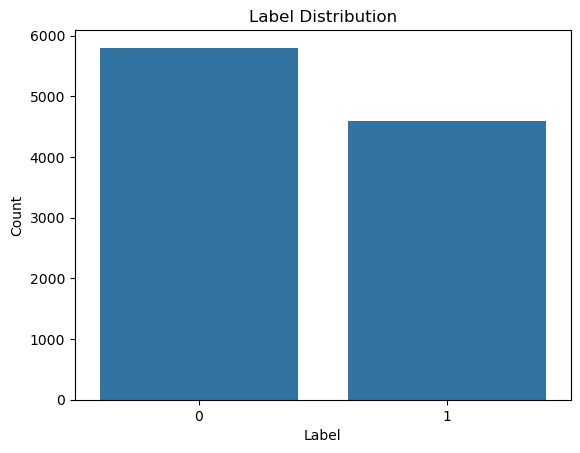


Examples of cyberbullying messages (Label=1):
5800    It certainly ought to Have we finished with th...
5801    Karl Malone is that person I meet that I have ...
5802    There are a lot of morons posting on this site...
5803    justice league scene breakdown <number> batman...
5804    CavusSeyit You are the one who believes in a g...
Name: Message, dtype: object

Examples of non-cyberbullying messages (Label=0):
0    Umm if this movie has not even been started pr...
1    these niggas fake quick to break they will ben...
2                     Why are you related to the judge
3    Even more meticulous interpretations of the Pa...
4    It is the nature of science that scientists ma...
Name: Message, dtype: object


In [5]:
# Check label distribution
label_counts = df['Label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display some examples of messages
print("\nExamples of cyberbullying messages (Label=1):")
print(df[df['Label'] == 1]['Message'].head())

print("\nExamples of non-cyberbullying messages (Label=0):")
print(df[df['Label'] == 0]['Message'].head())

This code performs two tasks: checking the label distribution and displaying examples of messages with specific labels.

##### Task 1: Check Label Distribution

1. **Calculate the distribution of labels**:
    ```python
    label_counts = df['Label'].value_counts()
    ```
   - `label_counts`: This variable stores the count of each unique value in the 'Label' column.

2. **Create a bar plot to visualize the label distribution**:

##### Task 2: Display Examples of Messages

1. **Display examples of messages labeled as cyberbullying (Label=1)**:
    ```python
    print("\nExamples of cyberbullying messages (Label=1):")
    print(df[df['Label'] == 1]['Message'].head())
    ```
   - This prints a header indicating that examples of cyberbullying messages will follow.
   - `df[df['Label'] == 1]['Message'].head()`: This selects and displays the first few messages where the label is 1 (cyberbullying).

2. **Display examples of messages labeled as non-cyberbullying (Label=0)**:
    ```python
    print("\nExamples of non-cyberbullying messages (Label=0):")
    print(df[df['Label'] == 0]['Message'].head())
    ```
   - This prints a header indicating that examples of non-cyberbullying messages will follow.
   - `df[df['Label'] == 0]['Message'].head()`: This selects and displays the first few messages where the label is 0 (non-cyberbullying).

In [6]:
label_counts = df['Label'].value_counts()

# Print out the counts
print(f"Number of messages labeled as 1 (cyberbullying): {label_counts.get(1, 0)}")
print(f"Number of messages labeled as 0 (not cyberbullying): {label_counts.get(0, 0)}")


Number of messages labeled as 1 (cyberbullying): 4597
Number of messages labeled as 0 (not cyberbullying): 5800


This code calculates the distribution of labels in the dataset and prints out the counts for each label.

1. **Calculate the distribution of labels**:
    ```python
    label_counts = df['Label'].value_counts()
    ```
   - `label_counts`: This variable stores the count of each unique value in the 'Label' column.

2. **Print the counts for each label**:
    ```python
    print(f"Number of messages labeled as 1 (cyberbullying): {label_counts.get(1, 0)}")
    print(f"Number of messages labeled as 0 (not cyberbullying): {label_counts.get(0, 0)}")
    ```
   - These two lines print the number of messages for each label.
   - `label_counts.get(1, 0)`: This retrieves the count of messages labeled as 1 (cyberbullying). If there are no such messages, it returns 0.
   - `label_counts.get(0, 0)`: This retrieves the count of messages labeled as 0 (not cyberbullying). If there are no such messages, it returns 0.

In [7]:
# Function to preprocess text
def preprocess_text(text):
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    
    # Remove special characters and numeric data like dates
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\b\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\b', '', text)  # Remove date-like patterns
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    
    if not text.strip():  # If the text is empty after removing, it's useless
        return None
    
    text = text.lower()  # Convert to lowercase
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens) if tokens else None  # Return None if no tokens remain

This function `preprocess_text` is designed to clean and preprocess text data for use in machine learning models such as SVM (Support Vector Machine) and BERT (Bidirectional Encoder Representations from Transformers). Here's a detailed explanation of each step:

1. **Define the function and docstring**:
    ```python
    def preprocess_text(text):

2. **Remove URLs**:
    ```python
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    ```
   - This line uses a regular expression to remove URLs from the text.

3. **Remove special characters and numeric data like dates**:
    ```python
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\b\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\b', '', text)  # Remove date-like patterns
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    ```
   - These lines use regular expressions to remove special characters, date-like patterns, and standalone numbers from the text.

4. **Filter out non-informative messages**:
    ```python
    if not text.strip():  # If the text is empty after removing, it's useless
        return None
    ```
   - This checks if the text is empty after the previous cleaning steps. If it is, it returns `None`.

5. **Convert text to lowercase**:
    ```python
    text = text.lower()
    ```
   - This converts all characters in the text to lowercase.

6. **Tokenization**:
    ```python
    tokens = text.split()
    ```
   - This splits the text into individual tokens (words).

7. **Remove stopwords**:
    ```python
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    ```
   - This removes common stopwords from the tokens. The `stop_words` set contains common English stopwords.

8. **Lemmatization**:
    ```python
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    ```
   - This lemmatizes the tokens, converting them to their base or root form using the `WordNetLemmatizer`.

9. **Return the cleaned and preprocessed text**:
    ```python
    return ' '.join(tokens) if tokens else None
    ```
   - This joins the tokens back into a single string and returns it. If no tokens remain, it returns `None`.

In [8]:
# Apply preprocessing to the dataset
print("\nPreprocessing the messages...")
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

# Drop rows where the message is empty or None (i.e., non-informative content)
df = df.dropna(subset=['Cleaned_Message'])


Preprocessing the messages...


This code applies preprocessing to the dataset, drops non-informative rows, encodes the labels, and displays the cleaned dataframe.

##### 1: Apply Preprocessing to the Dataset

1. **Apply the `preprocess_text` function to the 'Message' column and create a new column 'Cleaned_Message'**:
    ```python
    df['Cleaned_Message'] = df['Message'].apply(preprocess_text)
    ```
   - This line applies the previously defined `preprocess_text` function to each message in the 'Message' column and stores the result in a new column 'Cleaned_Message'.

##### 2: Drop Non-Informative Rows

1. **Drop rows where 'Cleaned_Message' is empty or None**:
    ```python
    df = df.dropna(subset=['Cleaned_Message'])
    ```
   - This line drops rows where the 'Cleaned_Message' column contains `None` values, indicating non-informative content.

In [9]:
# Encode labels
print("\nEncoding labels...")
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
print("Labels encoded as:", label_encoder.classes_)

# Display the cleaned dataframe
print(df.head())


Encoding labels...
Labels encoded as: [0 1]
                                             Message  Label  \
0  Umm if this movie has not even been started pr...      0   
1  these niggas fake quick to break they will ben...      0   
2                   Why are you related to the judge      0   
3  Even more meticulous interpretations of the Pa...      0   
4  It is the nature of science that scientists ma...      0   

                                     Cleaned_Message  Encoded_Label  
0  umm movie even started preproduction speculati...              0  
1                  nigga fake quick break bend nigga              0  
2                                      related judge              0  
3  even meticulous interpretation paleolithic die...              0  
4  nature science scientist make mistake meant ma...              0  


This code encodes the labels, and displays the cleaned dataframe.

##### 1: Encode Labels

1. **Encode the 'Label' column into a new column 'Encoded_Label' using `LabelEncoder`**:
    ```python
    label_encoder = LabelEncoder()
    df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
    print("Labels encoded as:", label_encoder.classes_)
    ```
   - `LabelEncoder()`: This creates an instance of the `LabelEncoder`.
   - `df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])`: This encodes the 'Label' column into a numeric format and stores the result in a new column 'Encoded_Label'.
   - `print("Labels encoded as:", label_encoder.classes_)`: This prints the classes used for encoding.

##### 2: Display the Cleaned Dataframe

In [10]:
# Count the total number of rows left
total_rows = df.shape[0]

# Count the number of cyberbullying (1) and non-cyberbullying (0) rows
cyberbullying_count = df['Encoded_Label'].value_counts().get(1, 0)  # 1 for cyberbullying
non_cyberbullying_count = df['Encoded_Label'].value_counts().get(0, 0)  # 0 for non-cyberbullying

# Print the counts
print(f"Total number of rows left after preprocessing: {total_rows}")
print(f"Number of cyberbullying messages (labeled as 1): {cyberbullying_count}")
print(f"Number of non-cyberbullying messages (labeled as 0): {non_cyberbullying_count}")

Total number of rows left after preprocessing: 10391
Number of cyberbullying messages (labeled as 1): 4594
Number of non-cyberbullying messages (labeled as 0): 5797


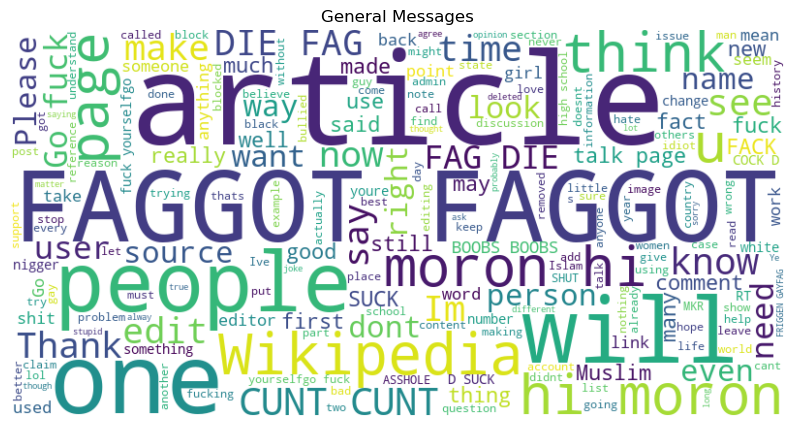

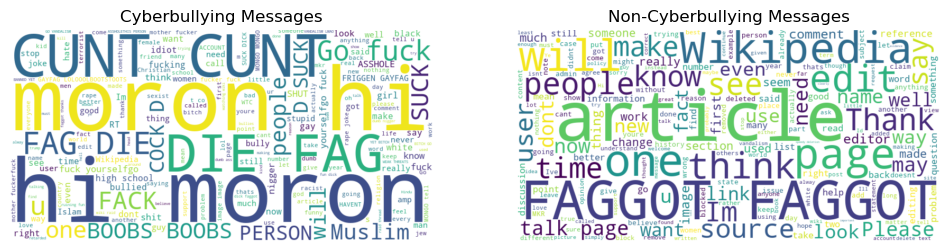

In [11]:
# Wordcloud
text = ' '.join(df['Message']) 

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title("General Messages")
plt.show()

print("\n\n\n")

# Separate text based on labels
text_1 = ' '.join(df[df['Encoded_Label'] == 1]['Message'])  # Cyberbullying messages
text_0 = ' '.join(df[df['Encoded_Label'] == 0]['Message'])  # Non-cyberbullying messages

# Create word clouds
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)

# Display the word clouds
plt.figure(figsize=(12, 5))

# Wordcloud for Cyberbullying messages
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title("Cyberbullying Messages")

# Wordcloud for Non-Cyberbullying messages
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Cyberbullying Messages")

plt.show()


In [12]:
# Define the features and labels
X = df['Cleaned_Message']
y = df['Encoded_Label']

# Split the data into 70% training, 15% test, and 15% validation

# First, split into train (70%) and the rest (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Now, split the 30% into test (50%) and validation (50%) to make both test and validation 15% each
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Display the sizes of each dataset
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 7273 samples
Validation set size: 1559 samples
Testing set size: 1559 samples


This code defines the features and labels, splits the dataset into training, validation, and testing sets.

#### 1: Define Features and Labels

1. **Define the features (X) and labels (y)**:
    ```python
    X = df['Cleaned_Message']
    y = df['Encoded_Label']
    ```
   - `X`: This variable stores the 'Cleaned_Message' column, which contains the preprocessed text data.
   - `y`: This variable stores the 'Encoded_Label' column, which contains the numeric labels.

#### 2: Split the Data

1. **Split the data into 70% training and 30% remaining (test + validation) sets**:
    ```python
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    ```
   - `train_test_split`: This function splits the data into training and remaining sets.
   - `X_train`, `X_temp`: `X_train` contains 70% of the features for training, and `X_temp` contains the remaining 30% for further splitting.
   - `y_train`, `y_temp`: `y_train` contains 70% of the labels for training, and `y_temp` contains the remaining 30% for further splitting.
   - `test_size=0.3`: This parameter sets aside 30% of the data for testing and validation.
   - `random_state=42`: This parameter ensures reproducibility of the split.
   - `stratify=y`: This parameter ensures that the splits maintain the original distribution of labels.

2. **Split the remaining 30% into 15% test and 15% validation sets**:
    ```python
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    ```
   - `train_test_split`: This function splits the remaining data into test and validation sets.
   - `X_val`, `X_test`: `X_val` contains 15% of the features for validation, and `X_test` contains 15% of the features for testing.
   - `y_val`, `y_test`: `y_val` contains 15% of the labels for validation, and `y_test` contains 15% of the labels for testing.
   - `test_size=0.5`: This parameter splits the remaining data evenly into test and validation sets.
   - `random_state=42`: This parameter ensures reproducibility of the split.
   - `stratify=y_temp`: This parameter ensures that the splits maintain the original distribution of labels.

In [13]:
# Initialize the TF-IDF Vectorizer
print("Feature Extraction in Progress...")
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))

# Fit the vectorizer on the training data and transform all three datasets
print("Initializing TF-IDF Vectorization...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("TF-IDF Vectorization completed.")

print("Feature Extraction Completed.\n")


# Print the shapes of the transformed data
print(f"Shape of training data after TF-IDF: {X_train_tfidf.shape}")
print(f"Shape of validation data after TF-IDF: {X_val_tfidf.shape}")
print(f"Shape of testing data after TF-IDF: {X_test_tfidf.shape}")

Feature Extraction in Progress...
Initializing TF-IDF Vectorization...
TF-IDF Vectorization completed.
Feature Extraction Completed.

Shape of training data after TF-IDF: (7273, 2000)
Shape of validation data after TF-IDF: (1559, 2000)
Shape of testing data after TF-IDF: (1559, 2000)


This code performs feature extraction on the text data using TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization, and prints the shapes of the transformed datasets.

#### Initialize the TF-IDF Vectorizer

1. **Initialize the `TfidfVectorizer`**:
    ```python
    tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
    ```
   - `TfidfVectorizer(max_features=2000, ngram_range=(1,2))`: This initializes the `TfidfVectorizer` with a maximum of 2000 features and considers both unigrams and bigrams (i.e., ngram range of 1 to 2).

#### Fit and Transform the Data

1. **Fit the vectorizer on the training data and transform all three datasets**:
    ```python
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    print("Feature Extraction Completed.")
    ```
   - `tfidf_vectorizer.fit_transform(X_train)`: This fits the vectorizer on the training data and transforms it into TF-IDF features.
   - `tfidf_vectorizer.transform(X_val)`: This transforms the validation data into TF-IDF features using the fitted vectorizer.
   - `tfidf_vectorizer.transform(X_test)`: This transforms the test data into TF-IDF features using the fitted vectorizer.
   - `print("Feature Extraction Completed.")`: This prints a message indicating that feature extraction is completed.

In [14]:
# Step 1: Initialize the SVM model with specified parameters
print("Initializing SVM model with C=1, kernel='linear', and default gamma...")
svm_model = SVC(C=0.4641, kernel='rbf', gamma='scale', probability=True, random_state=42)
print("Initialization completed.")

Initializing SVM model with C=1, kernel='linear', and default gamma...
Initialization completed.


This code initializes the SVM (Support Vector Machine) model with specified parameters.


1. **Initialize the SVM model**:
    ```python
    svm_model = SVC(C=1, kernel='linear', probability=True, random_state=42)
    ```
   - `SVC(C=1, kernel='linear', probability=True, random_state=42)`: This initializes the SVM model with the following parameters:
     - `C=1`: Regularization parameter. A smaller value of C makes the decision surface smoother, while a larger value of C aims to classify all training examples correctly.
     - `kernel='linear'`: Specifies the linear kernel type to be used by the algorithm.
     - `probability=True`: Enables probability estimates, which can be useful for some applications like probabilistic classification.
     - `random_state=42`: Ensures reproducibility by setting a random seed.

In [15]:
# Step 2: Train the model on the TF-IDF-transformed training data
print("Training the SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Training completed.")

Training the SVM model...
Training completed.


This code trains the SVM model on the TF-IDF-transformed training data and evaluates the model on the validation dataset.

   - `svm_model.fit(X_train_tfidf, y_train)`: This trains the SVM model using the TF-IDF-transformed training data (`X_train_tfidf`) and the training labels (`y_train`).

In [16]:
# Save Model & Vectorizer

import pickle

with open("svm.pkl", "wb") as svm_file:
    pickle.dump(svm_model, svm_file)

with open("svm_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel, AdamW, get_scheduler
import numpy as np
import time

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer & base DistilBERT model (without classification head)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased").to(device)
bert_model.eval()

# Function to generate DistilBERT embeddings (Mean Pooling)
def get_bert_embedding(text):
    encodings = tokenizer(text, truncation=True, padding="max_length", max_length=64, return_tensors="pt")
    input_ids = encodings["input_ids"].to(device)
    attention_mask = encodings["attention_mask"].to(device)

    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask=attention_mask)
    
    # Use mean pooling
    mean_embedding = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
    return mean_embedding

# Generate embeddings for training data
print("Generating embeddings for training data...")
X_train_embeddings = np.array([get_bert_embedding(text) for text in X_train]).squeeze()
X_test_embeddings = np.array([get_bert_embedding(text) for text in X_test]).squeeze()

# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_embeddings)
X_test_scaled = scaler.transform(X_test_embeddings)

# Save embeddings & scaler
np.save("X_train_scaled.npy", X_train_scaled)
np.save("X_test_scaled.npy", X_test_scaled)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

# Load precomputed embeddings (Optional: Avoid recomputation)
X_train_scaled = np.load("X_train_scaled.npy")
X_test_scaled = np.load("X_test_scaled.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Convert NumPy arrays to Torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch Dataset
class CyberbullyingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        return {
            "features": self.embeddings[idx],
            "labels": self.labels[idx]
        }

# Create DataLoaders
BATCH_SIZE = 16
train_dataset = CyberbullyingDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Define Classification Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Binary classification (Cyberbullying / No Cyberbullying)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize Model
model = SimpleNN(input_dim=X_train_tensor.shape[1]).to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training Loop
EPOCHS = 2
print("\nStarting Training...")

for epoch in range(EPOCHS):
    print(f"\n======== Epoch {epoch + 1} / {EPOCHS} ========")
    model.train()
    
    t0 = time.time()
    total_train_loss = 0

    for batch in train_loader:
        b_features = batch["features"].to(device)
        b_labels = batch["labels"].to(device)

        optimizer.zero_grad()

        outputs = model(b_features)
        loss = criterion(outputs, b_labels)

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
    
    avg_train_loss = total_train_loss / len(train_loader)
    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Epoch took: {time.time() - t0:.2f} seconds")

# Save Model
torch.save(model.state_dict(), "simple_nn_model.pth")
print("\nModel saved successfully!")

Generating embeddings for training data...

Starting Training...

======== Epoch 1 / 2 ========
  Training Loss: 0.5785
  Epoch took: 1.32 seconds

======== Epoch 2 / 2 ========
  Training Loss: 0.4713
  Epoch took: 1.29 seconds

Model saved successfully!


In [18]:
# Load trained DistilBERT model (Feature Extractor)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased").to(device)
bert_model.eval()

print("Generating improved embeddings...")
# Function to generate improved DistilBERT embeddings
def get_bert_embedding(text):
    encodings = tokenizer(text, truncation=True, padding="max_length", max_length=64, return_tensors="pt")
    input_ids = encodings["input_ids"].to(device)
    attention_mask = encodings["attention_mask"].to(device)

    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask=attention_mask)
    
    # Use mean pooling
    mean_embedding = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
    return mean_embedding


# Generate improved embeddings
X_train_embeddings = np.array([get_bert_embedding(text) for text in X_train]).squeeze()
X_test_embeddings = np.array([get_bert_embedding(text) for text in X_test]).squeeze()


# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_embeddings)
X_test_scaled = scaler.transform(X_test_embeddings)

print("Generation completed.")

Generating improved embeddings...
Generation completed.


In [19]:
# Hyperparameter tuning for SVM using GridSearchCV

# print("Starting Hyperparemter Tuning...")

# svm_params = {
#     "C": np.logspace(-3, 3, 10),  
#     "kernel": ["linear", "rbf"],  
#     "gamma": ["scale", "auto"]
# }

# svm_model = RandomizedSearchCV(SVC(), svm_params, cv=5, scoring="accuracy", n_iter=20, n_jobs=-1, random_state=42)
# svm_model.fit(X_train_pca, y_train)

# # svm_model = GridSearchCV(SVC(), svm_params, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)
# # svm_model.fit(X_train_pca, y_train)

# print("Hyperparamter tuning completed...")

# print("Saving the best hybrid mode...")

# # Save the best hybrid model
# with open("hybrid_manual.pkl", "wb") as hybrid_file:
#     pickle.dump(svm_model.best_estimator_, hybrid_file)

# print("Model saved successfully")

# # Print the hyperparameters of the best model
# print("Best Model Hyperparameters:", svm_model.best_params_)

custom_params = {
    "C": 0.4641,  # Manually input the desired C value
    "kernel": "rbf",           # Choose between 'linear' or 'rbf'
    "gamma": "scale"           # Choose between 'scale' or 'auto'
}

print("Using manually selected hyperparameters:", custom_params)

# Initialize the SVM model with custom hyperparameters
svm_model = SVC(C=custom_params["C"], kernel=custom_params["kernel"], gamma=custom_params["gamma"])

# Train the model
print("Training the SVM model with selected parameters...")
svm_model.fit(X_train_scaled, y_train)
print("Training completed.")

# Save the manually configured hybrid model
print("Saving the hybrid model with manual hyperparameters...")
with open("hybrid_manual.pkl", "wb") as hybrid_file:
    pickle.dump(svm_model, hybrid_file)

print("Model saved successfully!")

Using manually selected hyperparameters: {'C': 0.4641, 'kernel': 'rbf', 'gamma': 'scale'}
Training the SVM model with selected parameters...
Training completed.
Saving the hybrid model with manual hyperparameters...
Model saved successfully!


In [106]:
# Load SVM Model & Vectorizer
with open("svm.pkl", "rb") as svm_file:
    svm_model = pickle.load(svm_file)

with open("svm_vectorizer.pkl", "rb") as vec_file:
    svm_vectorizer = pickle.load(vec_file)

# Load DistilBERT Model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased").to(device)

model.eval()

# Load Hybrid Model
with open("hybrid_manual.pkl", "rb") as hybrid_file:
    optimized_hybrid = pickle.load(hybrid_file)

# Function for DistilBERT Prediction
def predict_text(text):

    start_time = time.time()
    
    encoding = tokenizer.encode_plus(
        text, add_special_tokens=True, max_length=64, truncation=True,
        padding='max_length', return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    prediction = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    elapsed_time = time.time() - start_time
    print(f"Time taken for DistilBERT detection: {elapsed_time:.4f}")
    return "Cyberbullying Detected\n" if prediction == 1 else "No Cyberbullying\n"


# Function for Hybrid Model
def predict_hybrid(text):
    start_time = time.time()
    features = get_bert_embedding(text)  # Get BERT embeddings
    prediction = optimized_hybrid.predict(features)[0]  # Predict with hybrid model
    elapsed_time = time.time() - start_time
    print(f"Time taken for Hybrid model detection: {elapsed_time:.4f}")
    return "Cyberbullying Detected\n" if prediction == 1 else "No Cyberbullying\n"


# Unified Testing Function
def test_model(message, model_type):
    if model_type == "svm":
        start_time = time.time()
        transformed_text = svm_vectorizer.transform([message])
        prediction = svm_model.predict(transformed_text)[0]
        elapsed_time = time.time() - start_time
        print(f"Time taken for SVM detection: {elapsed_time:.4f}")
        return "Cyberbullying Detected\n" if prediction == 1 else "No Cyberbullying\n"


    elif model_type == "distilbert":
        return predict_text(message)

    elif model_type == "hybrid":
        return predict_hybrid(message)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [89]:
message = "Wow, you’re so talented… at being useless."
print(test_model(message, "svm"))      
print(test_model(message, "distilbert"))
print(test_model(message, "hybrid"))

Time taken for SVM detection: 0.0115
No Cyberbullying

Time taken for DistilBERT detection: 0.1664
No Cyberbullying

Time taken for Hybrid model detection: 0.1379
Cyberbullying Detected



In [95]:
message = "Nobody likes you. Maybe take the hint and disappear."
print(test_model(message, "svm"))      
print(test_model(message, "distilbert"))
print(test_model(message, "hybrid"))

Time taken for SVM detection: 0.0091
No Cyberbullying

Time taken for DistilBERT detection: 0.1708
No Cyberbullying

Time taken for Hybrid model detection: 0.1296
Cyberbullying Detected



In [100]:
message = "Your life is a joke. Just saying."
print(test_model(message, "svm"))      
print(test_model(message, "distilbert"))
print(test_model(message, "hybrid"))

Time taken for SVM detection: 0.0135
Cyberbullying Detected

Time taken for DistilBERT detection: 0.1709
Cyberbullying Detected

Time taken for Hybrid model detection: 0.1289
Cyberbullying Detected



In [105]:
message = "You seriously thought you looked good in that? LMAO."
print(test_model(message, "svm"))      
print(test_model(message, "distilbert"))
print(test_model(message, "hybrid"))

Time taken for SVM detection: 0.0069
No Cyberbullying

Time taken for DistilBERT detection: 0.1144
No Cyberbullying

Time taken for Hybrid model detection: 0.1395
Cyberbullying Detected



In [107]:
message = "I’d be embarrassed to show my face if I were you."
print(test_model(message, "svm"))      
print(test_model(message, "distilbert"))
print(test_model(message, "hybrid"))

Time taken for SVM detection: 0.0106
No Cyberbullying

Time taken for DistilBERT detection: 0.1779
Cyberbullying Detected

Time taken for Hybrid model detection: 0.1474
Cyberbullying Detected



Loading saved SVM model...
Model loaded successfully.
Accuracy: 0.7954
Precision: 0.8031
Recall: 0.7954
F1 Score: 0.7908
ROC AUC Score: 0.8555


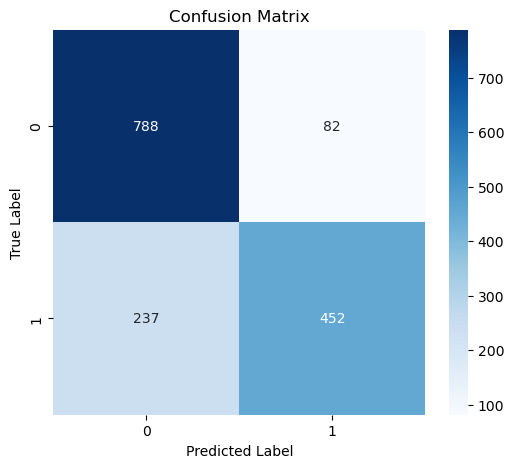

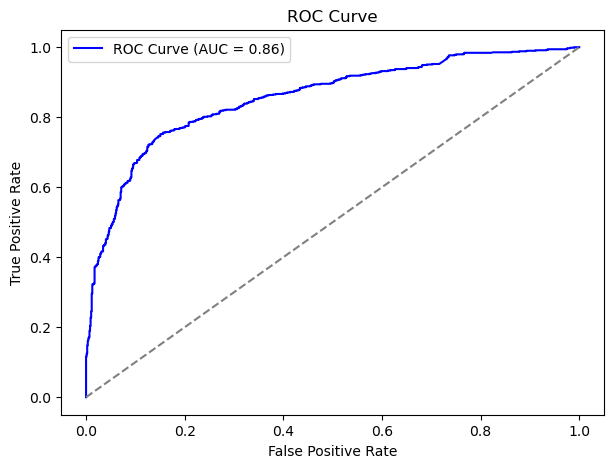

In [22]:
from sklearn.metrics import f1_score  # Re-import f1_score to override any accidental redefinitions

# Load the saved model
print("Loading saved SVM model...")
svm_model = joblib.load('svm.pkl')  # Ensure you have saved your model as 'svm_model.pkl'
print("Model loaded successfully.")

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test_tfidf)
svm_y_pred_proba = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Compute evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_roc_auc = roc_auc_score(y_test, svm_y_pred_proba)

# Display evaluation metrics
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"ROC AUC Score: {svm_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Accuracy: 0.7652
Precision: 0.7706
Recall: 0.7652
F1 Score: 0.7660
ROC AUC Score: 0.8531


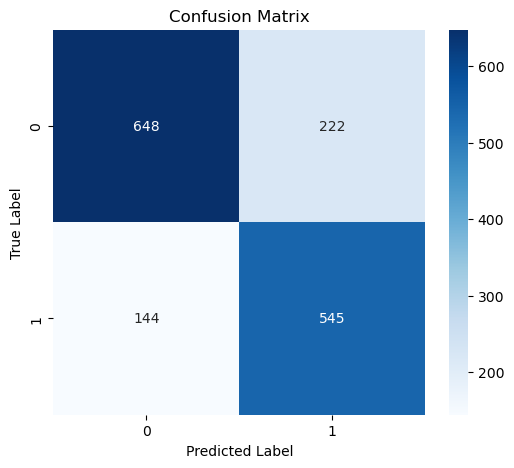

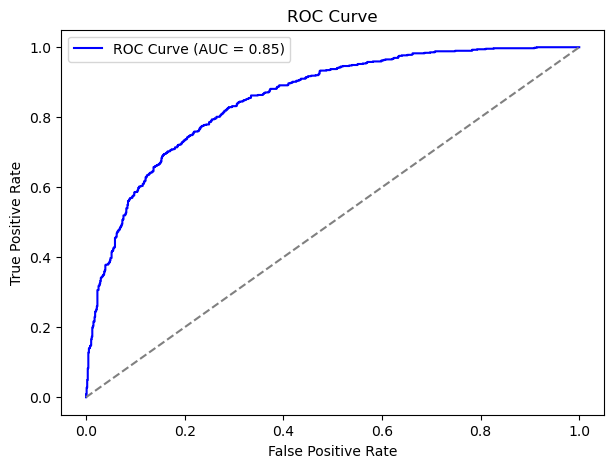

In [23]:
from sklearn.metrics import f1_score

# Load precomputed test embeddings and labels
X_test_scaled = np.load("X_test_scaled.npy")
y_test = np.load("y_test.npy")

# Convert NumPy arrays to Torch tensors
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Load trained model
input_dim = X_test_tensor.shape[1]
model = SimpleNN(input_dim=input_dim).to(device)
model.load_state_dict(torch.load("simple_nn_model.pth"))
model.eval()

# Evaluate model
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred_proba = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()

# Compute evaluation metrics
d_accuracy = accuracy_score(y_test, y_pred)
d_precision = precision_score(y_test, y_pred, average='weighted')
d_recall = recall_score(y_test, y_pred, average='weighted')
d_f1 = f1_score(y_test, y_pred, average='weighted')
d_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display evaluation metrics
print(f"Accuracy: {d_accuracy:.4f}")
print(f"Precision: {d_precision:.4f}")
print(f"Recall: {d_recall:.4f}")
print(f"F1 Score: {d_f1:.4f}")
print(f"ROC AUC Score: {d_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {d_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Loaded saved Hybrid model successfully.
Fetching embeddings for evaluation...
Embeddings fetched.

=== Model Evaluation ===
Accuracy: 0.7838
Precision: 0.7627
Recall: 0.7417
F1 Score: 0.7520
ROC AUC Score: 0.8637


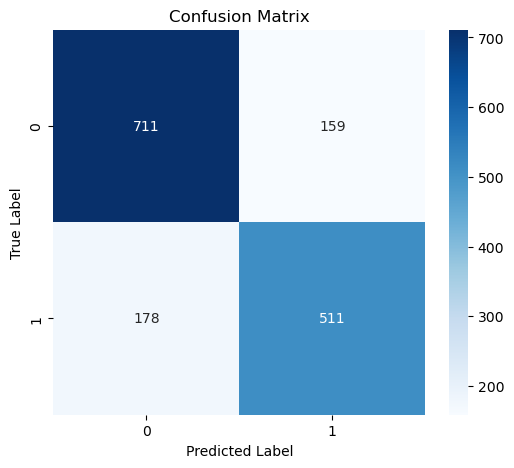

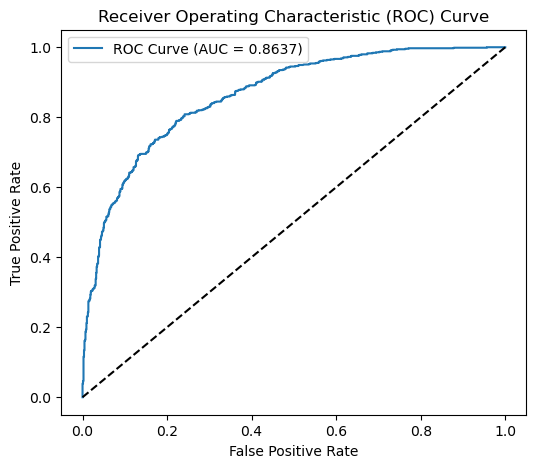

In [24]:
from sklearn.metrics import f1_score  # Re-import f1_score to override any accidental redefinitions

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and BERT model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased").to(device)
bert_model.eval()

# Load saved SVM model
with open("hybrid_manual.pkl", "rb") as hybrid_file:
    hybrid_model = pickle.load(hybrid_file)

print("Loaded saved Hybrid model successfully.")

# Generate embeddings for test data
print("Fetching embeddings for evaluation...")

print("Embeddings fetched.")

# Make predictions
hybrid_y_pred = hybrid_model.predict(X_test_scaled)

# Get probabilities for ROC AUC score
hybrid_y_pred_proba = hybrid_model.decision_function(X_test_scaled)

# Evaluation Metrics
hybrid_accuracy = accuracy_score(y_test, hybrid_y_pred)
hybrid_precision = precision_score(y_test, hybrid_y_pred)
hybrid_recall = recall_score(y_test, hybrid_y_pred)
hybrid_f1 = f1_score(y_test, hybrid_y_pred)
hybrid_roc_auc = roc_auc_score(y_test, hybrid_y_pred_proba)
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_y_pred)

# Print Evaluation Metrics
print("\n=== Model Evaluation ===")
print(f"Accuracy: {hybrid_accuracy:.4f}")
print(f"Precision: {hybrid_precision:.4f}")
print(f"Recall: {hybrid_recall:.4f}")
print(f"F1 Score: {hybrid_f1:.4f}")
print(f"ROC AUC Score: {hybrid_roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, hybrid_y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, hybrid_y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {hybrid_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

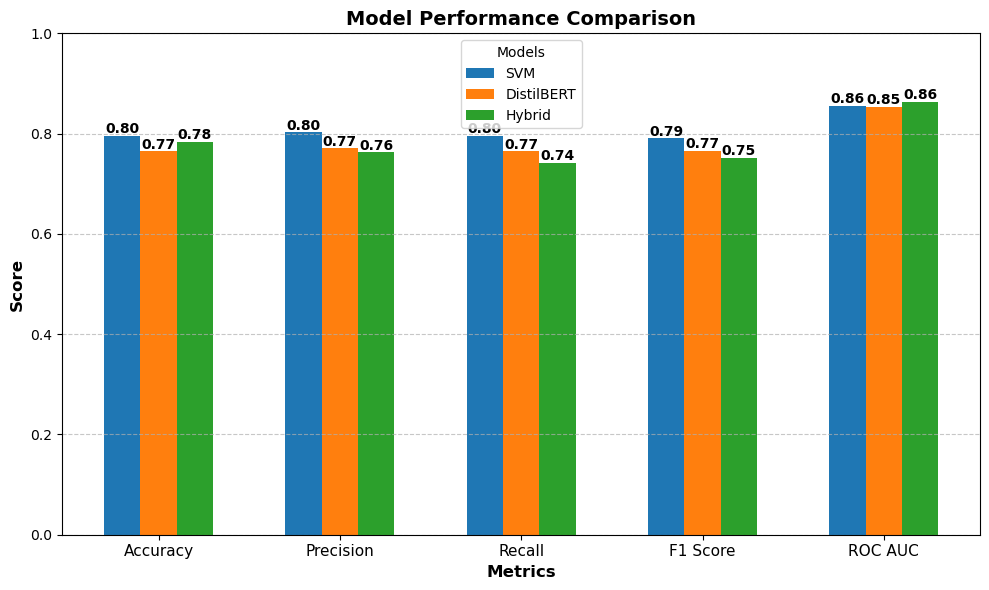

In [25]:
# Model names
models = ["SVM", "DistilBERT", "Hybrid"]

# Metric scores (replace these with your actual values)
accuracy = [svm_accuracy, d_accuracy, hybrid_accuracy]
precision = [svm_precision, d_precision, hybrid_precision]
recall = [svm_recall, d_recall, hybrid_recall]
f1_score = [svm_f1, d_f1, hybrid_f1]
roc_auc = [svm_roc_auc, d_roc_auc, hybrid_roc_auc]

# Metrics and their corresponding values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [accuracy, precision, recall, f1_score, roc_auc]

# Bar plot settings
x = np.arange(len(metrics))  # X locations for groups
width = 0.2  # Width of each bar

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's performance
for i, model in enumerate(models):  
    model_scores = [accuracy[i], precision[i], recall[i], f1_score[i], roc_auc[i]]  # Get scores for each model
    bars = ax.bar(x + i * width, model_scores, width, label=model)  

    # Add values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", 
                ha="center", fontsize=10, fontweight="bold")

# Labels & Title
ax.set_xlabel("Metrics", fontsize=12, fontweight="bold")
ax.set_ylabel("Score", fontsize=12, fontweight="bold")
ax.set_title("Model Performance Comparison", fontsize=14, fontweight="bold")
ax.set_xticks(x + width)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim(0, 1)  # Set y-axis limit
ax.legend(title="Models")

# Improve Layout
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
